In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('./restaurants.csv')

In [162]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## 1. Preprocess, clean, and analyze the given dataset.

In [164]:
df.drop(['url','address','dish_liked','reviews_list','phone','menu_item'],axis = 1,inplace = True)

In [165]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [166]:
# droppping duplicates
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

In [167]:
# analysing column by column

In [168]:
## online_order column

df.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [169]:
## book_table column

df.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [170]:
## rate column

df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [171]:
# Rate column is a object dtype we have to convert it into float also there are some wrong inputs like 
# 'NEW' and '-' we have to remove those.

def handlerate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df.rate = df.rate.apply(handlerate)

In [172]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [173]:
# filling the null values of rate column with the mean

df.rate.fillna(df.rate.mean(), inplace=True)
df.rate.isnull().sum()

0

In [174]:
# vote column is already settled

In [175]:
## Location column

# There is a location column as well as listed_in(city) column which are similar.Hence dropping one of them

df.drop('listed_in(city)',axis = 1,inplace =True)

In [176]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [177]:
df.shape

(51609, 10)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [179]:
# There are some missing values in string format which we cannot assume hence we will have to drop them

df.dropna(inplace =True)
df.shape

(51042, 10)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [181]:
# Only about 600 rows are drops which compared to 51k is very less so it will not harm the model.

In [182]:
## location column

df.location.value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [183]:
# there are many locations having very few restaurants, putting those restaurants in the  other category

location = df.location.value_counts()
location_lessthan_450 = location[location < 450] 


def handlelocation(value):
    if value in location_lessthan_450:
        return 'others'
    else:
        return value
    
df.location = df.location.apply(handlelocation)
df.location.value_counts()

others                   6537
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [184]:
## rest_type column 

df.rest_type.value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [185]:
# there are many restraunt type having very few types, putting those in the  other category 

rest_type = df.rest_type.value_counts()
rest_type_lessthan_1000 = rest_type[rest_type < 1000]

def handle_rest_type(value):
    if value in rest_type_lessthan_1000:
        return 'other'
    else:
        return value
    
df.rest_type = df.rest_type.apply(handle_rest_type)
df.rest_type.value_counts()

Quick Bites           19010
Casual Dining         10253
other                  9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [186]:
## Cuisines columns  -  doing same with cuisines columnn

cuisine = df.cuisines.value_counts()
cuisine_lessthan_100 = cuisine[cuisine < 100]

def handle_cuisine(value):
    
    if value in cuisine_lessthan_100:
        return 'other'
    else:
        return value
    
df.cuisines = df.cuisines.apply(handle_cuisine)
df.cuisines.value_counts()

other                                  26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [187]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet


In [188]:
## approx_cost(for two people) column

df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [189]:
# it has number in the string form we have to convert them into float

def handle_cost(value):
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(handle_cost)
df['approx_cost(for two people)'].dtype

dtype('float64')

In [190]:
## listed_in column

df['listed_in(type)'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: listed_in(type), dtype: int64

In [191]:
# it is already settled

## DATA VISUALIZATION

In [195]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet


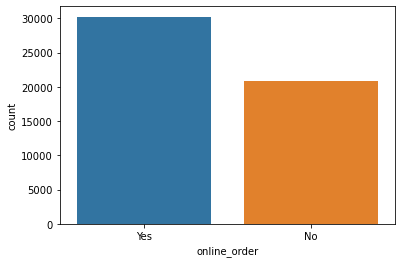

In [197]:
# visualizing the online_order

sns.countplot(df.online_order)
plt.show()

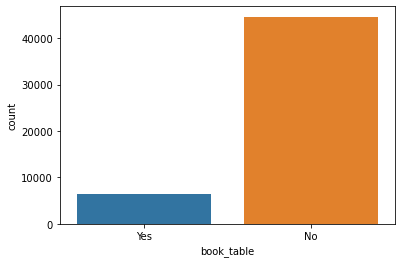

In [198]:
# visualizing the book_table

sns.countplot(df.book_table)
plt.show()

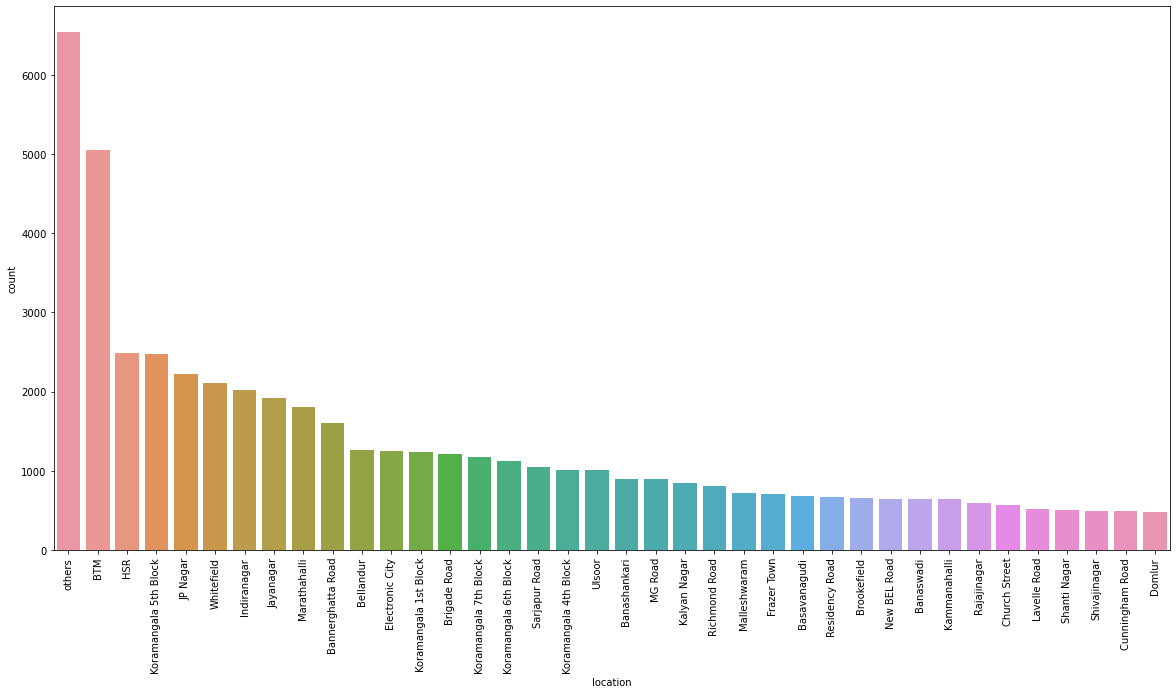

In [208]:
# visualizing the location
plt.figure(figsize=(20,10))
sns.countplot(df.location,order =df['location'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [206]:
## Here we can see the number of restaurants offering online ordering service categorized by locations


df1=df.groupby(['location','online_order'])['name'].count()
# To plot the data we need to do these steps
# Save the new data frame in csv formate
df1.to_csv('location_online.csv')
# read the data frame
df1=pd.read_csv('location_online.csv')
# create a pivote table with location as index and online order as column
df1=pd.pivot_table(df1, values=None,index='location',columns='online_order',fill_value=0,aggfunc=np.sum)
# Table will look like this
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Cunningham Road         168   322
Domlur                  247   235
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
Ulsoor                  389   622
Whitefield              986  1119
others                 2903  3634

## 2. How would you consider a restaurant to be successful?

--- from the data we can say that we can consider the restaurant to successful on the basis of the rating and the number of votes given to them by he customers.

## 3. What kind of restaurant do you have to start in order to be successful?

In [228]:
df3=df.groupby(['location','cuisines'])['name'].count()
df3.to_csv('location_cuisines.csv')
df3=pd.read_csv('location_cuisines.csv')
df3=pd.pivot_table(df3, values=None,index='location',columns='cuisines',fill_value=0,aggfunc=np.sum)
df3

name                                                  \
cuisines              Andhra Andhra, Biryani Arabian Bakery Bakery, Desserts   
location                                                                       
BTM                       10              26      55     46               45   
Banashankari               4               1       2      8               25   
Banaswadi                  4               0       2      8               14   
Bannerghatta Road          7              13       2     50               23   
Basavanagudi               0               0       0     15               20   
Bellandur                  6               6       4      8               33   
Brigade Road               0               0       0     32                0   
Brookefield                0               0       2      8                9   
Church Street             11               0       0      0                0   
Cunningham Road            0               0       0      3                1   
Domlur                     2               7       0      9               25   
Electronic City           11              11       4     25               24   
Frazer Town                0               0       0     16               27   
HSR                        8               2       8     16               36   
Indiranagar               22               2       0     21               20   
JP Nagar                  10              12       2     26               66   
Jayanagar                  8               6       2     19               43   
Kalyan Nagar               8               0       4     14               22   
Kammanahalli               0               0      14      0                4   
Koramangala 1st Block      0               0       0     16               52   
Koramangala 4th Block      0               0       5     15               22   
Koramangala 5th Block     20              10       6      6               37   
Koramangala 6th Block      0               9       0      5               13   
Koramangala 7th Block      0               0       0     22               21   
Lavelle Road               0               0       0     20                0   
MG Road                    0               0       0      2                8   
Malleshwaram               0               4       0     17                8   
Marathahalli              12               5       2     22               36   
New BEL Road               0               3       2      6               10   
Rajajinagar                0               0       0     13               10   
Residency Road             0              10       0     10                5   
Richmond Road              0               0       1      8                0   
Sarjapur Road              4               3       2     19               34   
Shanti Nagar               0               0       0     15               14   
Shivajinagar               0               0       0      6                6   
Ulsoor                     0               0      16      9               27   
Whitefield                 7               7       7     19               40   
others                    15               6      12     95              118   

                                                                       \
cuisines              Bakery, Fast Food Beverages Beverages, Desserts   
location                                                                
BTM                                   5        87                  19   
Banashankari                          0         2                   0   
Banaswadi                             1         4                   2   
Bannerghatta Road                     8         2                   0   
Basavanagudi                          0         5                   8   
Bellandur                             1         0                   4   
Brigade Road                         14         0                   1   
Brookefield  

In [220]:
df2=df.groupby(['location','listed_in(type)'])['name'].count()
df2.to_csv('location_type.csv')
df2=pd.read_csv('location_type.csv')
df2=pd.pivot_table(df2, values=None,index='location',columns='listed_in(type)',fill_value=0,aggfunc=np.sum)
df2


name                                   \
listed_in(type)       Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                   100   161     3464      414     2193   

                                                        
listed_in(type)       Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Cunningham Road                       16             7  
Domlur                                12            11  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar                           65            66  
JP Nagar                              51             7  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  7            16  
Koramangala 4th Block                 62       

In [230]:
df2[df2.index == 'Basavanagudi']

name                                                      \
listed_in(type) Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                     
Basavanagudi         7    11      344       66      251                  5   

                               
listed_in(type) Pubs and bars  
location                       
Basavanagudi                0

In [242]:
a = df3[df3.index == 'Basavanagudi']
a.isnull().sum()

      cuisines                                        
name  Andhra                                              0
      Andhra, Biryani                                     0
      Arabian                                             0
      Bakery                                              0
      Bakery, Desserts                                    0
                                                         ..
      South Indian, North Indian                          0
      South Indian, North Indian, Chinese                 0
      South Indian, North Indian, Chinese, Street Food    0
      Street Food                                         0
      other                                               0
Length: 70, dtype: int64

## Let us assume i have to start a restaurant in Basavanagudi.

According to the above sorted data, we can see there are few Drinks and nightlife, buffest types of restaurant in Basavanagudi and there are 0 pubs and bars type of restaurants in Basavanagudi.




Therefore i will start a pub and bars restuarant in Basavanagudi as i will have no competition and i will be unique in that area. I will also keep book table option as very less restaurants are providing that service.




My type of cuisines would be anything from above as no one else would be providing that in basavanagudi




Hence my changes of success will be greater.




Similarly we can decide for various Areas


## 4. Is it possible to compare different localities by the type of restaurant in the area?

In [219]:
df2


name                                   \
listed_in(type)       Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                   100   161     3464      414     2193   

                                                        
listed_in(type)       Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Cunningham Road                       16             7  
Domlur                                12            11  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar                           65            66  
JP Nagar                              51             7  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  7            16  
Koramangala 4th Block                 62       

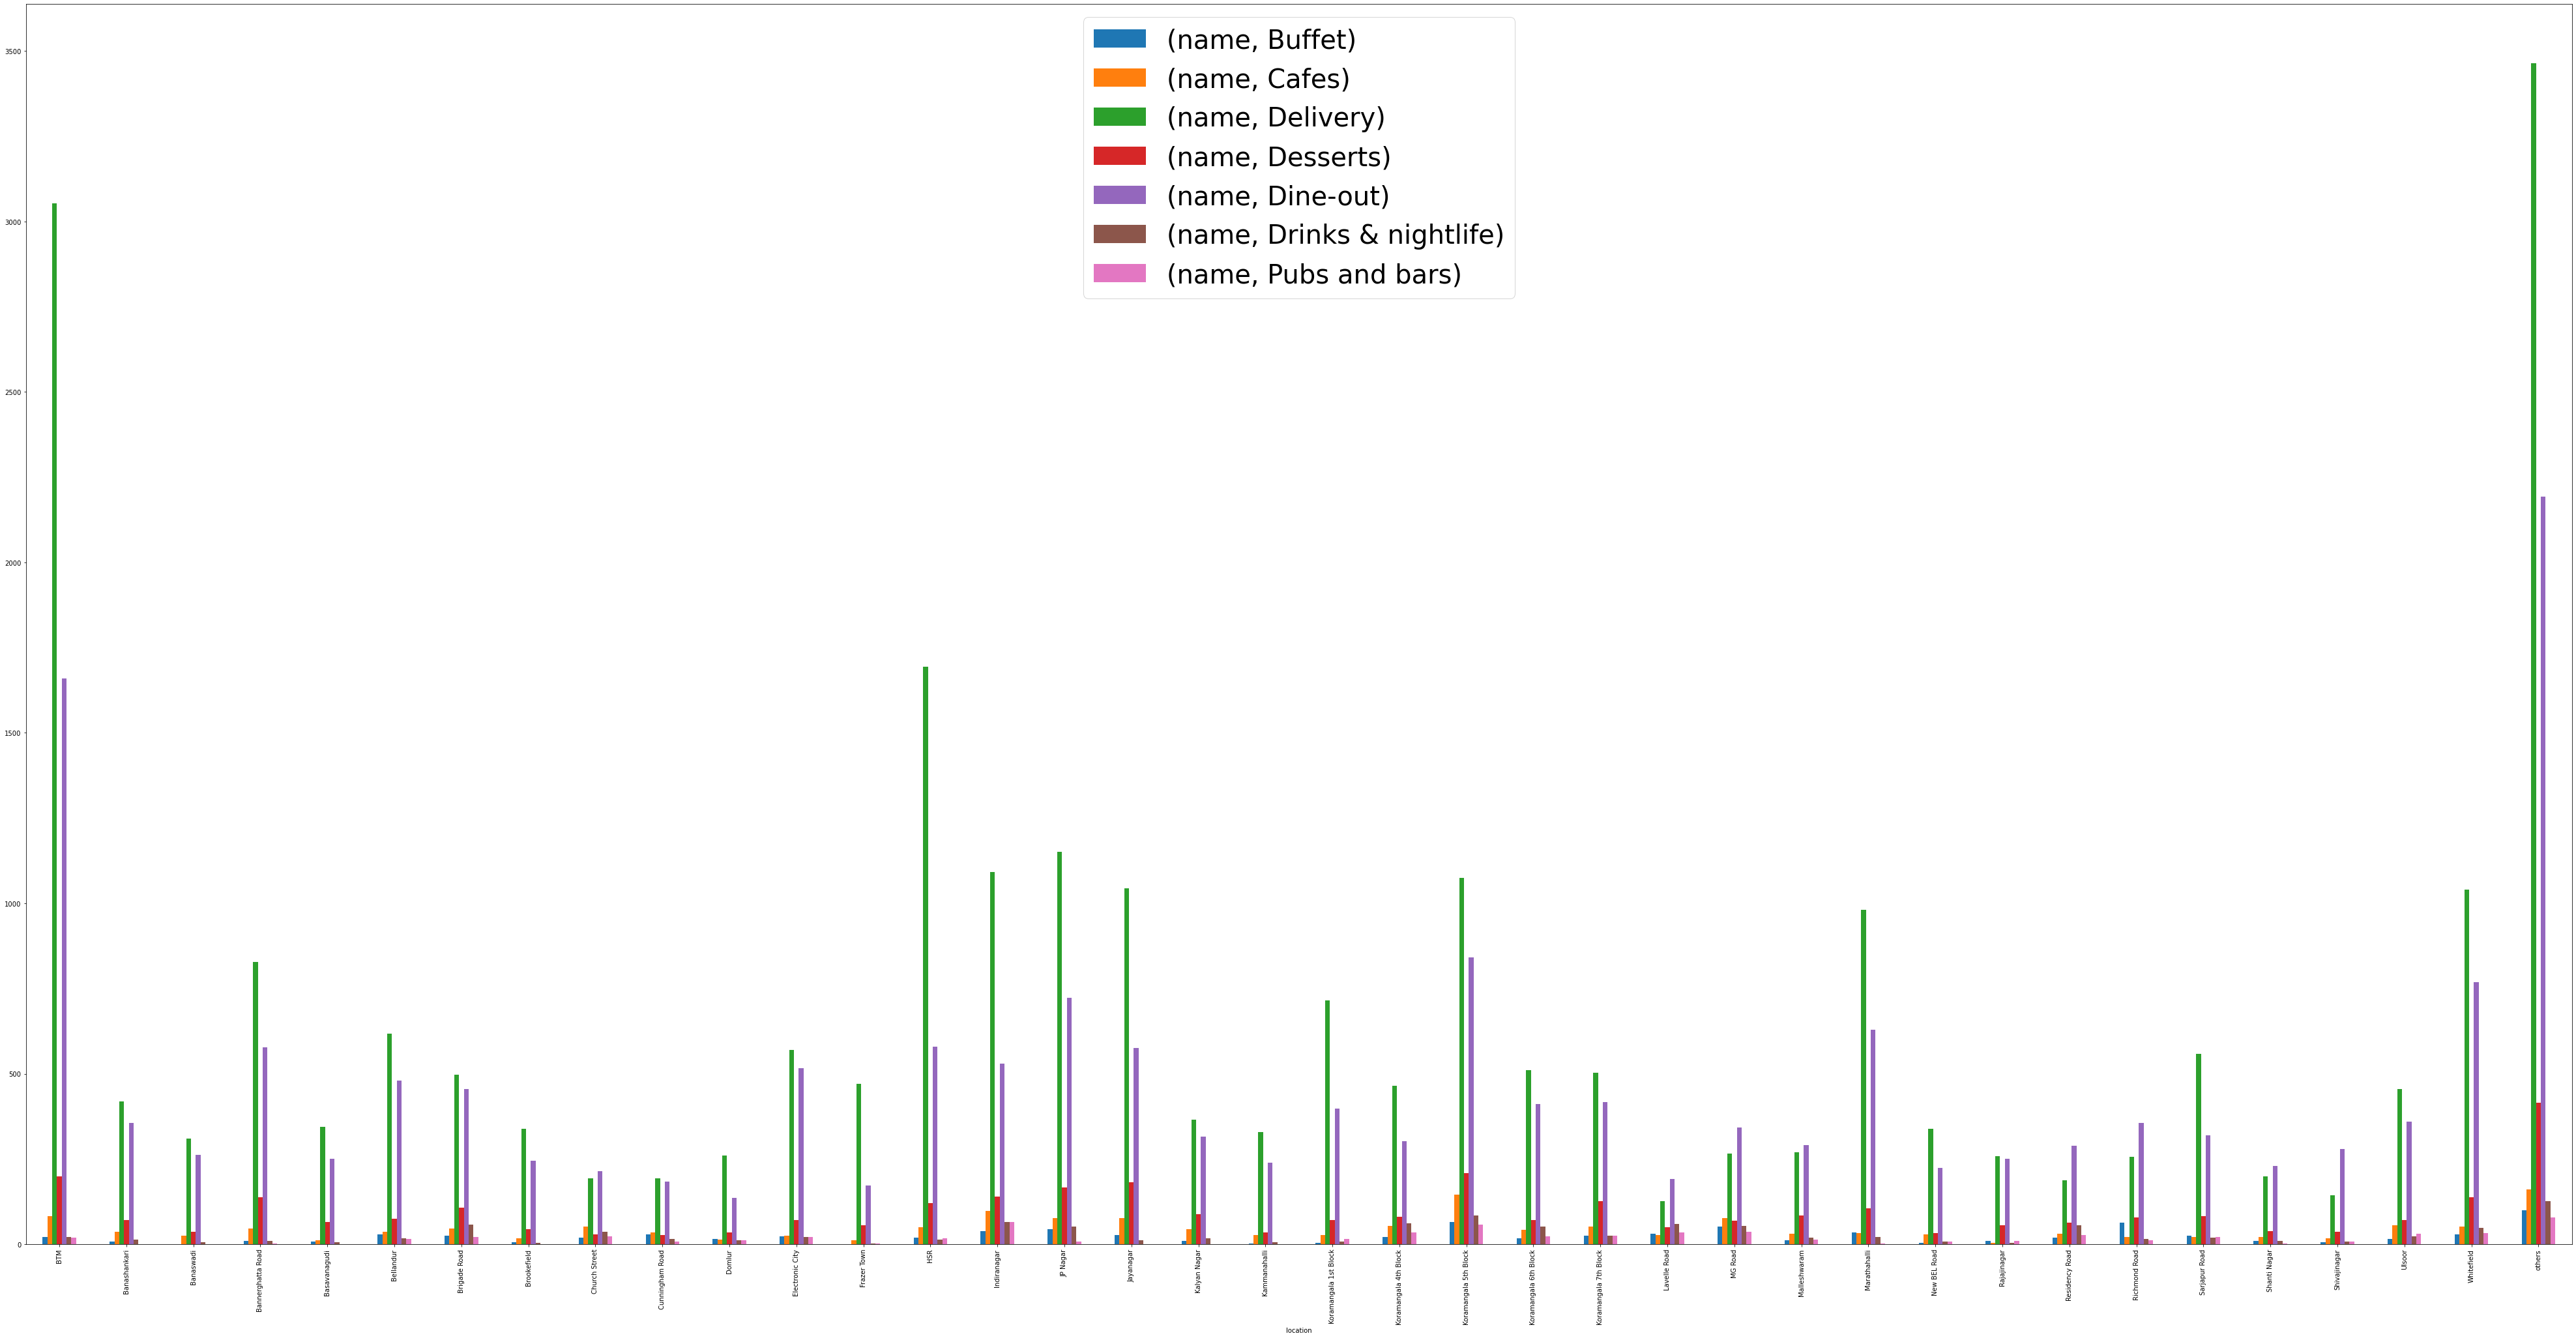

In [426]:

df2.plot(kind = 'bar',figsize=(70,35))
plt.legend(prop={'size': 40})
plt.show()

## 5. What kind of extra information can you provide using your understanding of the dataset?

<AxesSubplot:xlabel='listed_in(type)', ylabel='rate'>

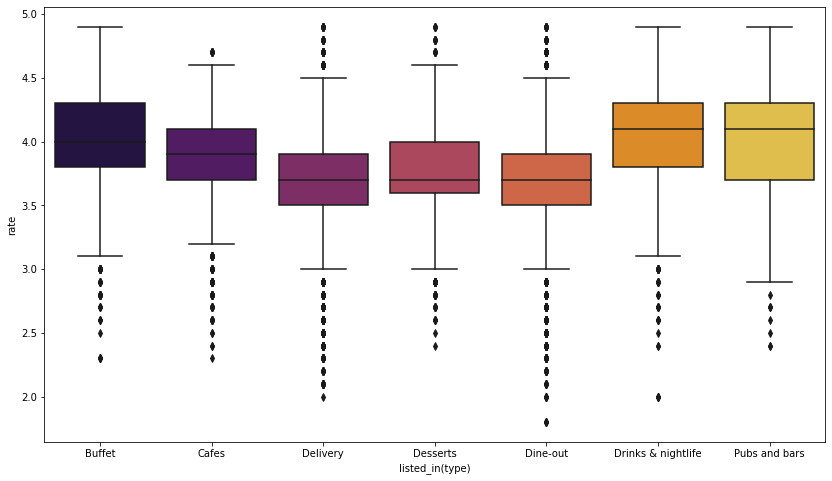

In [286]:
plt.figure(figsize=(14,8))
sns.boxplot(df['listed_in(type)'],df['rate'] ,palette='inferno')

In [ ]:
 # From above we can see that Buffet, Drinks & Nightlife and , pubs & bars have more ratings

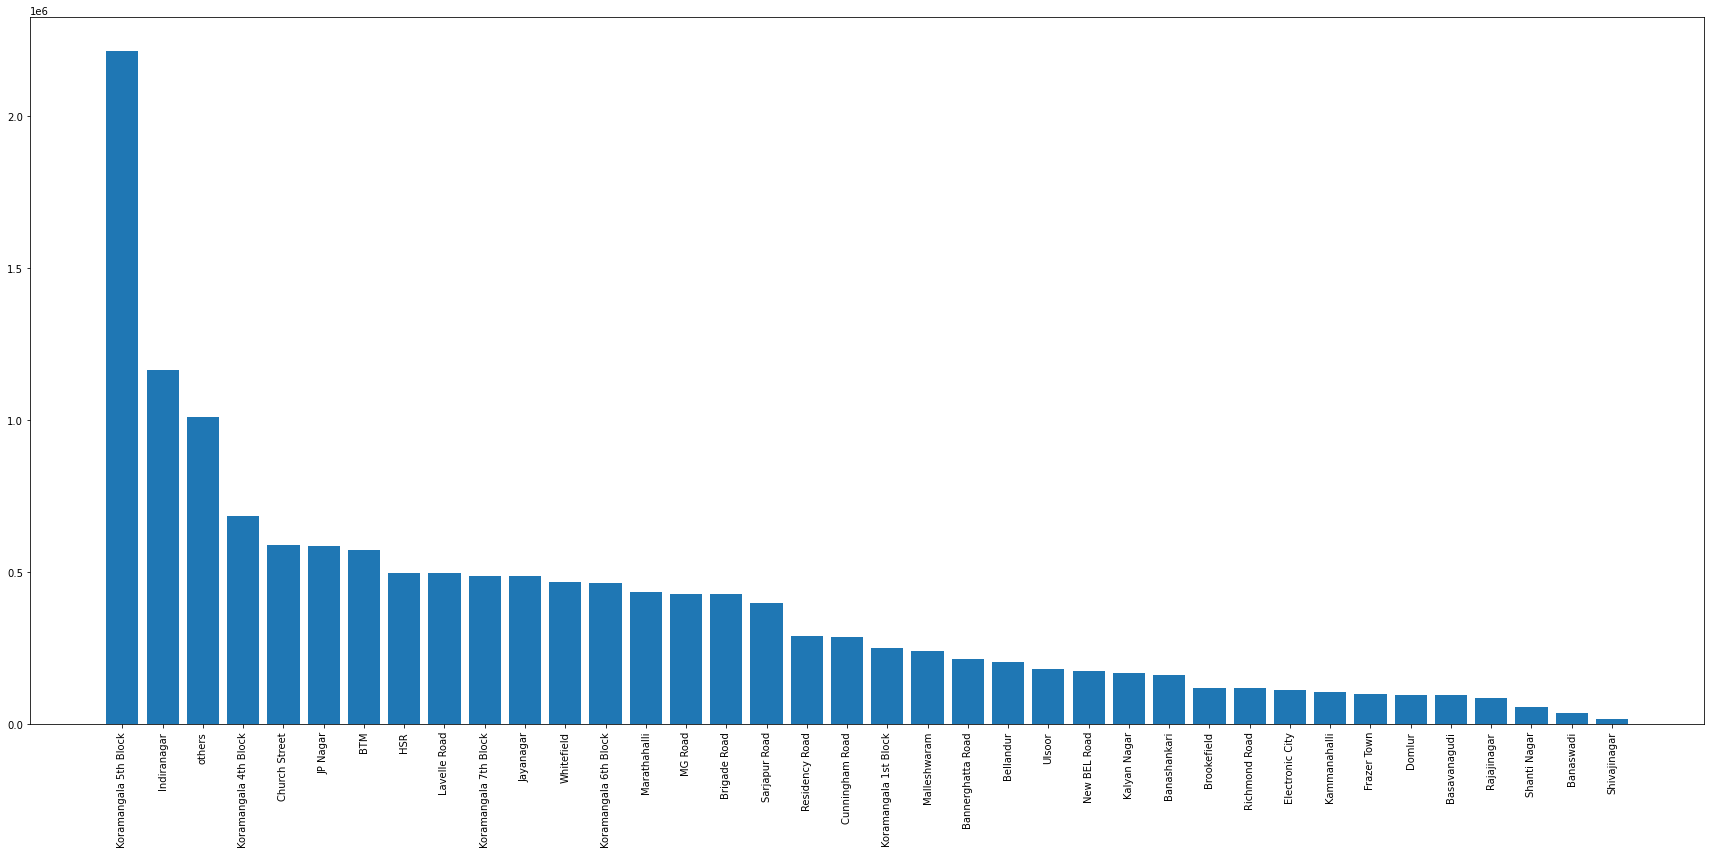

In [310]:
df4=df[['votes','location']]
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)



plt.figure(figsize = (30,13))
plt.bar(df5.index,df5['votes'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# From above data most votes given to the location can be classified

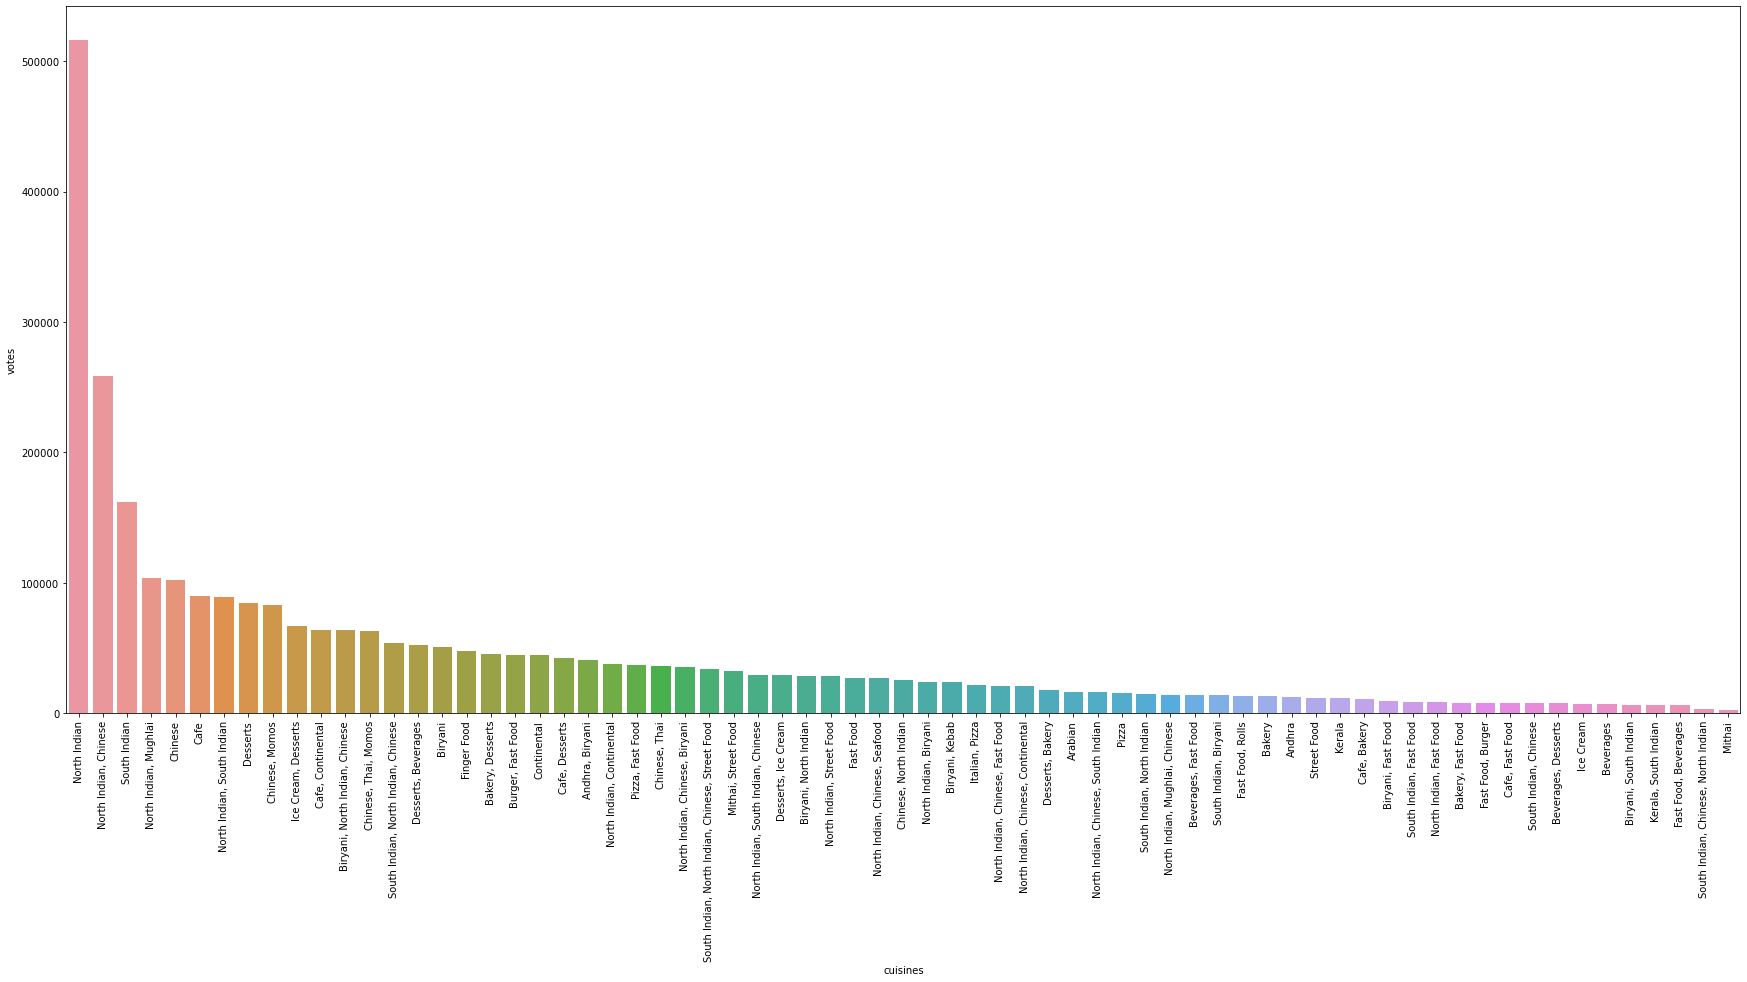

In [326]:
df6=df[['votes','cuisines']]
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes',ascending=False)

df7=df7.iloc[1:, :]


plt.figure(figsize = (30,13))
sns.barplot(df7.index,df7.votes)
plt.xticks(rotation = 90)
plt.show()

In [328]:
 # From above we can say that most loved cuisine is North Indian followed by chinese,south indian,etc

In [357]:

##  Most costliest restaurant in banglore

costliest = df.loc[df['approx_cost(for two people)'] == df['approx_cost(for two people)'].max()]
costliest[['name','approx_cost(for two people)']].iloc[1]


name                           Le Cirque Signature - The Leela Palace
approx_cost(for two people)                                    6000.0
Name: 45618, dtype: object


In [358]:

##  Most cheapest restaurant in banglore

cheapest = df.loc[df['approx_cost(for two people)'] == df['approx_cost(for two people)'].min()] 
cheapest[['name','approx_cost(for two people)']].iloc[1]

name                           Srinidhi Sagar Food Line
approx_cost(for two people)                        40.0
Name: 12232, dtype: object

## 6. What is the impact of the ratings on the sales segregated based on an order type?

In [374]:
df8 = df.groupby(['online_order'])['rate'].sum()
df8 = df8.to_frame()

<AxesSubplot:xlabel='online_order', ylabel='rate'>

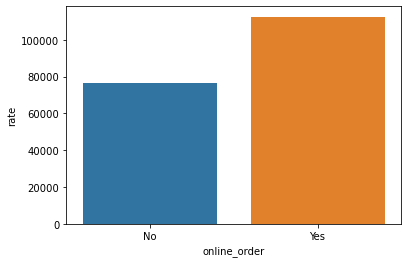

In [377]:
 sns.barplot(df8.index,df8.rate)

In [384]:
# We can see that the sum of the rates have been increased when the restaurants offer online order option,
# which means more sales if online order is available.

## 7. In a certain scenario five least-performing restaurants will have to shut their operations. Based on the data provided, what parameters will help them boost their sales? How & why?

In [390]:
# As the dataset does not have any sales or revenue feature let's consider that the number of votes are 
# directly portional to sales. So we will compare votes feature with other to get the output.

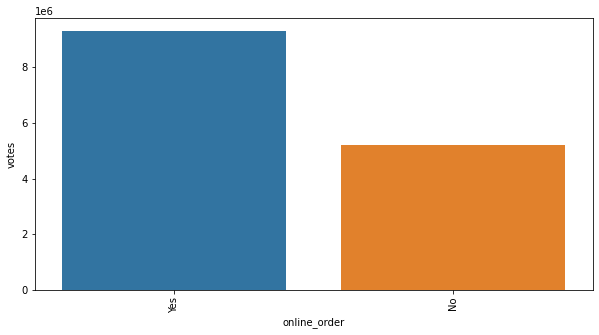

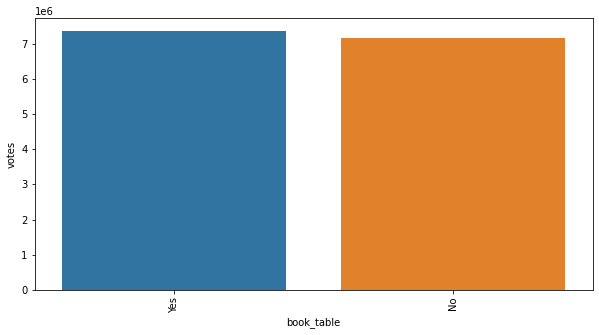

In [412]:
b = df[['online_order','book_table']]

for i in b.columns:
    
    x=df[['votes',i]]
    x=x.groupby([i])['votes'].sum()
    x=x.to_frame()
    x=x.sort_values('votes',ascending=False)

    
    plt.figure(figsize = (10,5))
    sns.barplot(x.index,x.votes)
    plt.xticks(rotation = 90)
    plt.show()

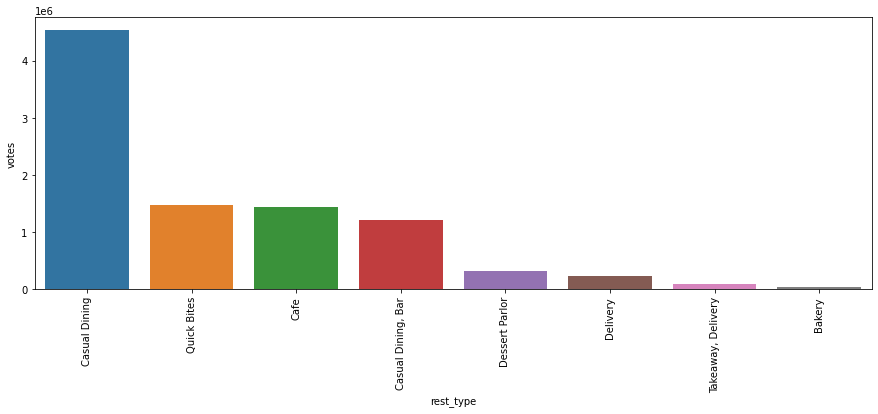

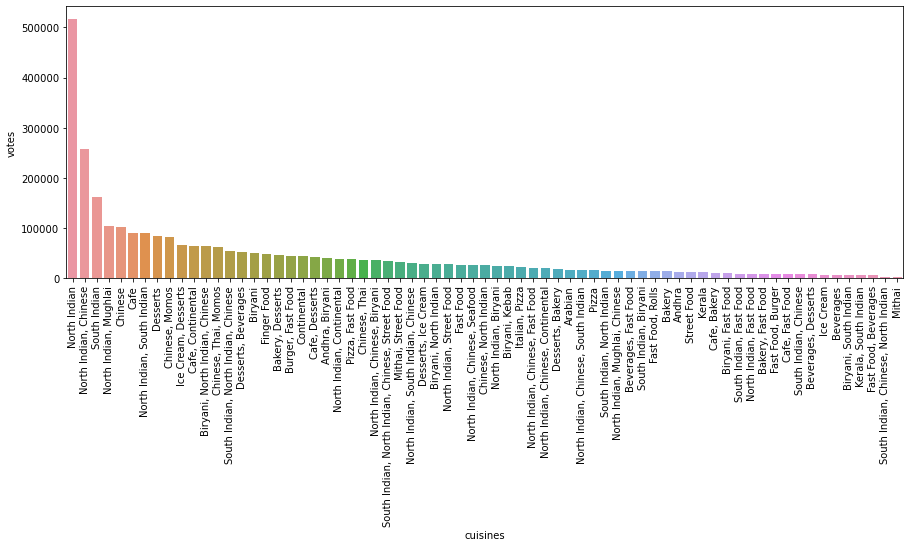

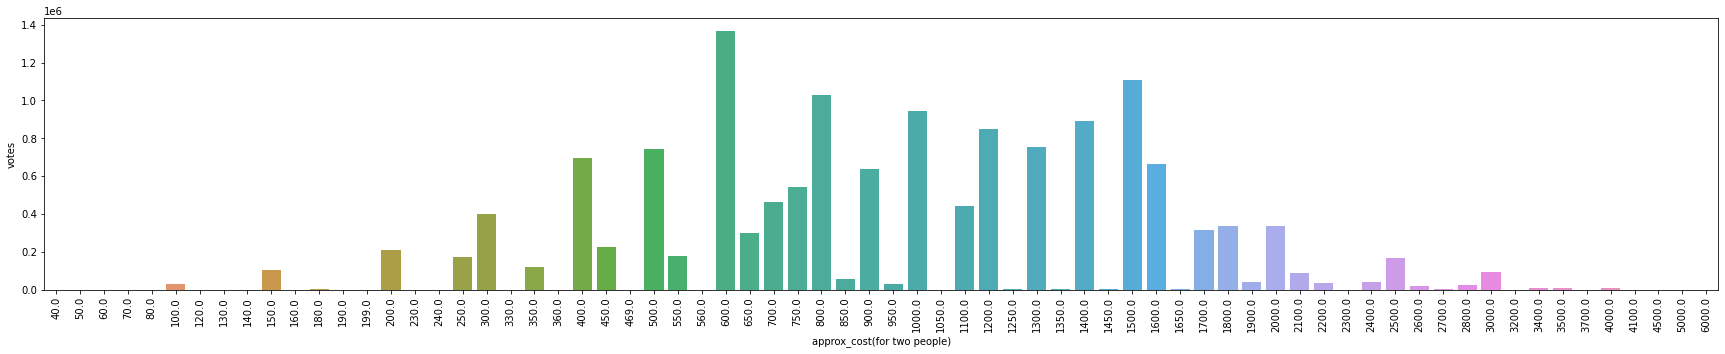

In [425]:
c = df[['rest_type','cuisines']]

for i in c.columns:
    x=df[['votes',i]]
    x=x.groupby([i])['votes'].sum()
    x=x.to_frame()
    x=x.sort_values('votes',ascending=False)
    x=x.iloc[1:, :]

    
    plt.figure(figsize = (15,5))
    sns.barplot(x.index,x.votes)
    plt.xticks(rotation = 90)
    plt.show()
    
x=df[['votes','approx_cost(for two people)']]
x=x.groupby(['approx_cost(for two people)'])['votes'].sum()
x=x.to_frame()
x=x.sort_values('votes',ascending=False)

    
plt.figure(figsize = (30,5))
sns.barplot(x.index,x.votes)
plt.xticks(rotation = 90)
plt.show()